Setup Kaggle api and Download Dataset

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"manavbvijayan","key":"eba4d0fe2ebf8d73597a5334e6683ad7"}'}

In [3]:
!mkdir -p ~/.kaggle  # created a .kaggle directory
!mv kaggle.json ~/.kaggle/ # moves the json file to created dir
!chmod 600 ~/.kaggle/kaggle.json # giving permission

In [4]:
# Download and unzip the dataset
!kaggle datasets download -d jessicali9530/celeba-dataset --force
!unzip celeba-dataset.zip -d celeba-dataset

Streaming output truncated to the last 5000 lines.
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197604.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197605.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197606.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197607.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197608.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197609.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197610.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197611.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197612.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197613.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197614.jpg  
  inflating: celeba-dataset/img_align_celeba/img_align_celeba/197615.jpg  
  inflating: celeba-dataset/img_align_celeba/img_

Load Dataset into the enviroment

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import os

In [2]:
celebA_csv_path = '/content/celeba-dataset/list_attr_celeba.csv' # path to csv file contain attribute label for each image
celebA_data = pd.read_csv(celebA_csv_path)
celebA_data.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [7]:
# basic info about the dataset
celebA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

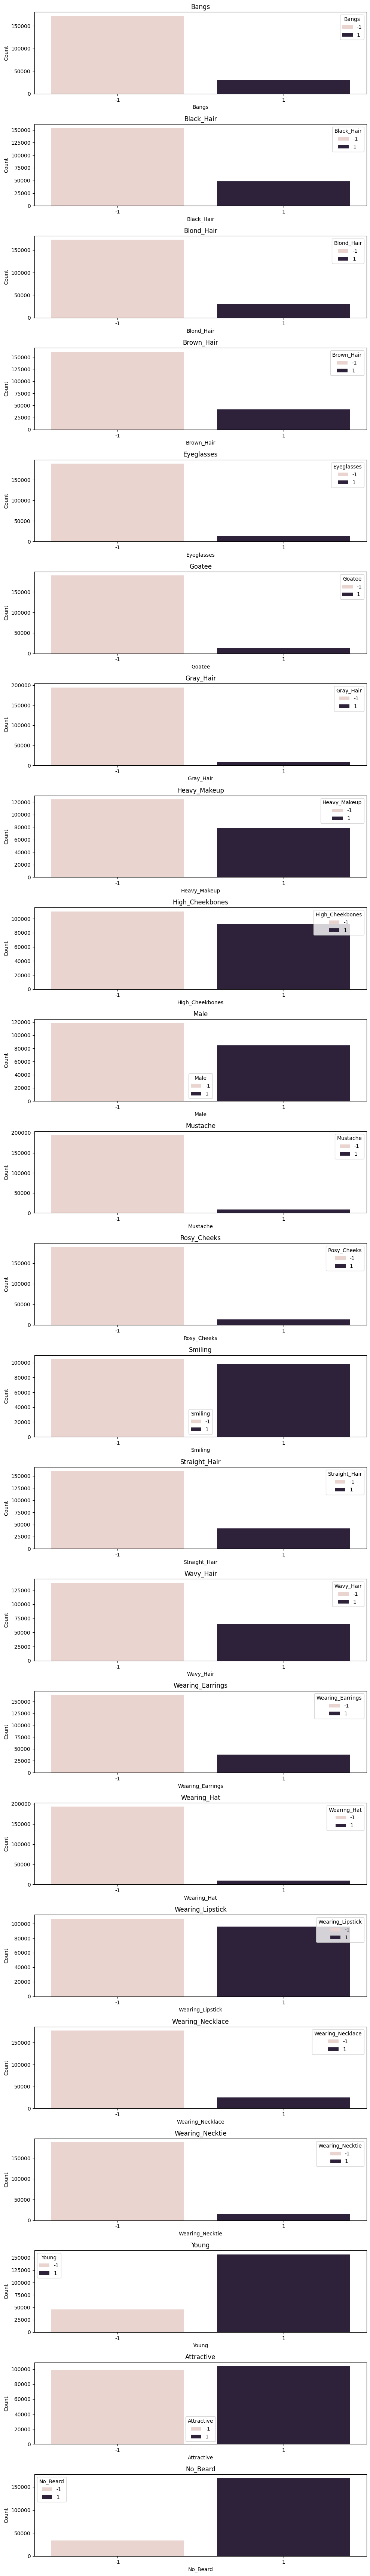

In [8]:
relevant_features = ['Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee',
                     'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache',
                     'Rosy_Cheeks', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
                     'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
                     'Young', 'Attractive', 'No_Beard'] # relevant feature for finding fashion from face attirubutes

fig, axes = plt.subplots(nrows=len(relevant_features), figsize=(10, len(relevant_features)*3))


for i, feature in enumerate(relevant_features):
  sns.countplot(ax=axes[i], x=feature, hue=feature, data=celebA_data)
  axes[i].set_title(feature)  # Set title for each subplot
  axes[i].set_xlabel(feature)  # Set x-axis label (can be feature name itself)
  axes[i].set_ylabel('Count')  # Set y-axis label

# Adjust layout (optional)
plt.tight_layout()

# Display the figure
plt.show()

* from this we can see the most of the features are imbalenced this may cause the bias

In [3]:
# To reduce the imbalence in the data, fouced on important features and try to minmize the imbalance

relevant_features = ['Wearing_Necktie', 'Goatee', 'Wearing_Hat','Eyeglasses','Gray_Hair','Mustache','Rosy_Cheeks'] # Imbalanced important feature for fashion analyis for facial attribute

sample_celebA = pd.DataFrame() # Create an empty DataFrame to store the sample
for feature in relevant_features:
    value_counts = celebA_data[feature].value_counts()
    min_count_minus_1 = value_counts.get(-1, 0)
    min_count_1 = value_counts.get(1, 0)
    min_count = min(min_count_minus_1, min_count_1)     # Determine the overall minimum count across both classes
    sample_minus_1 = celebA_data[celebA_data[feature] == -1].sample(min_count, replace=True)     # Sample instances for class -1
    sample_1 = celebA_data[celebA_data[feature] == 1].sample(min_count, replace=True)     # Sample instances for class 1
    sample = pd.concat([sample_minus_1, sample_1], ignore_index=True)     # Concatenate the samples for both classes
    sample_celebA = pd.concat([sample_celebA, sample], ignore_index=True)    # Append the sample to the final sample DataFrame
sample_celebA.drop_duplicates(inplace=True) # Remove duplicate images
sample_celebA = sample_celebA.sample(frac=1).reset_index(drop=True) # Shuffle the final sample


In [4]:
sample_celebA.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,168561.jpg,1,-1,1,-1,-1,-1,-1,1,1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,1
1,052712.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,1,-1,-1,-1,-1,-1,1,-1
2,067533.jpg,-1,-1,-1,-1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,1,-1,-1,-1,1
3,164396.jpg,-1,-1,1,-1,-1,1,-1,-1,-1,...,-1,1,-1,1,-1,-1,1,-1,-1,1
4,132975.jpg,-1,-1,1,1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,-1,-1,-1,1,1


In [5]:
sample_celebA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96465 entries, 0 to 96464
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_id             96465 non-null  object
 1   5_o_Clock_Shadow     96465 non-null  int64 
 2   Arched_Eyebrows      96465 non-null  int64 
 3   Attractive           96465 non-null  int64 
 4   Bags_Under_Eyes      96465 non-null  int64 
 5   Bald                 96465 non-null  int64 
 6   Bangs                96465 non-null  int64 
 7   Big_Lips             96465 non-null  int64 
 8   Big_Nose             96465 non-null  int64 
 9   Black_Hair           96465 non-null  int64 
 10  Blond_Hair           96465 non-null  int64 
 11  Blurry               96465 non-null  int64 
 12  Brown_Hair           96465 non-null  int64 
 13  Bushy_Eyebrows       96465 non-null  int64 
 14  Chubby               96465 non-null  int64 
 15  Double_Chin          96465 non-null  int64 
 16  Eyeg

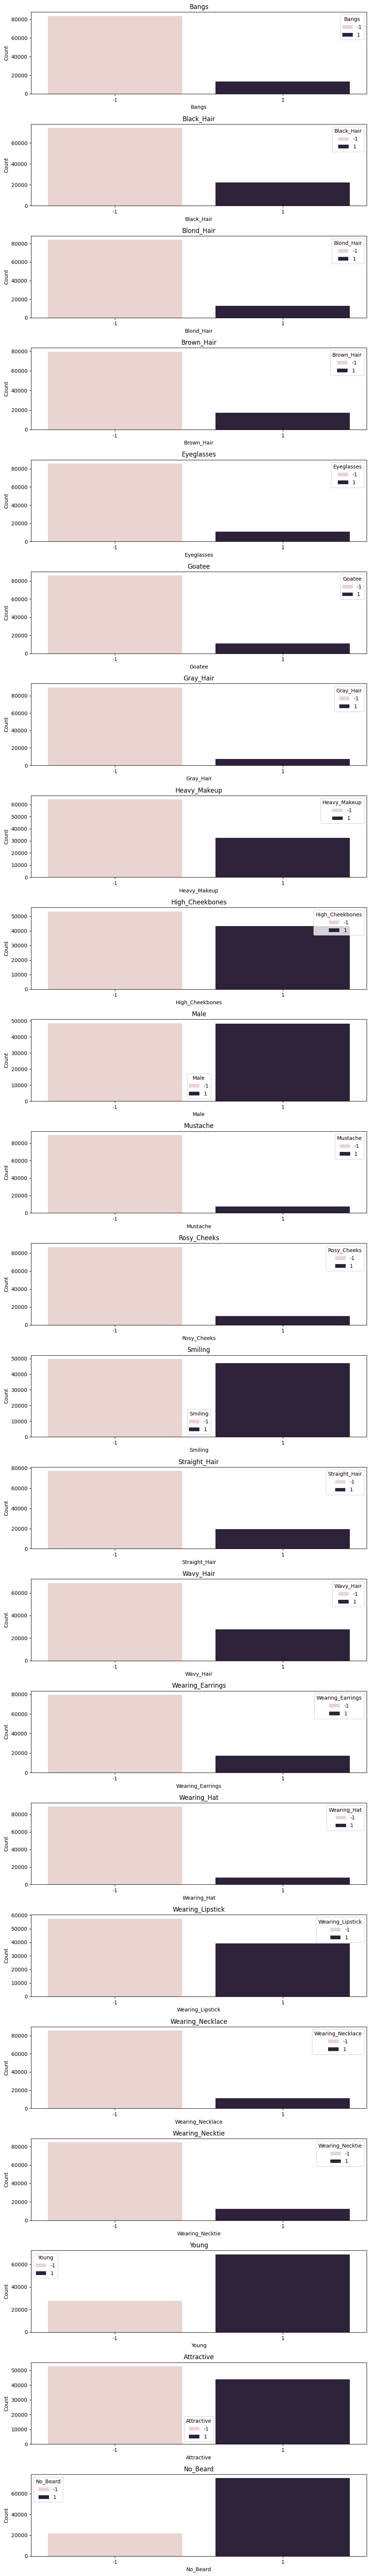

In [12]:
relevant_features = ['Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee',
                     'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache',
                     'Rosy_Cheeks', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
                     'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
                     'Young', 'Attractive', 'No_Beard'] # relevant feature for finding fashion from face attirubutes

fig, axes = plt.subplots(nrows=len(relevant_features), figsize=(10, len(relevant_features)*3))

for i, feature in enumerate(relevant_features):
  sns.countplot(ax=axes[i], x=feature, hue=feature, data=sample_celebA)
  axes[i].set_title(feature)
  axes[i].set_xlabel(feature)
  axes[i].set_ylabel('Count')

plt.tight_layout()# Adjust layout (optional)
plt.show() # Display the figure

* We minimize the entire dataset into having 96688 without losing the importantce and reduced the imbalance in the data

In [6]:
# we only need the relavance features for our analysis so other than relavance features we can drop
relevant_features = ['image_id','Bangs', 'Black_Hair', 'Blond_Hair', 'Brown_Hair', 'Eyeglasses', 'Goatee',
                     'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mustache',
                     'Rosy_Cheeks', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
                     'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie',
                     'Young', 'Attractive', 'No_Beard']
sample_celebA = sample_celebA[relevant_features]
sample_celebA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96465 entries, 0 to 96464
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   image_id          96465 non-null  object
 1   Bangs             96465 non-null  int64 
 2   Black_Hair        96465 non-null  int64 
 3   Blond_Hair        96465 non-null  int64 
 4   Brown_Hair        96465 non-null  int64 
 5   Eyeglasses        96465 non-null  int64 
 6   Goatee            96465 non-null  int64 
 7   Gray_Hair         96465 non-null  int64 
 8   Heavy_Makeup      96465 non-null  int64 
 9   High_Cheekbones   96465 non-null  int64 
 10  Male              96465 non-null  int64 
 11  Mustache          96465 non-null  int64 
 12  Rosy_Cheeks       96465 non-null  int64 
 13  Smiling           96465 non-null  int64 
 14  Straight_Hair     96465 non-null  int64 
 15  Wavy_Hair         96465 non-null  int64 
 16  Wearing_Earrings  96465 non-null  int64 
 17  Wearing_Hat 

In [22]:
def map_to_fashion_mnist(row):
    # Criteria for Male Casual
    if (row['Male'] == 1 and row['Young'] == 1 and row['Heavy_Makeup'] == -1):
        return 'Young Male Casual'

    if (row['Male'] == 1 and row['Young'] == -1 and row['Heavy_Makeup'] == -1):
        return 'Old Male Casual'

    # Criteria for Female Casual
    if (row['Male'] == -1 and row['Young'] == 1 and row['Heavy_Makeup'] == -1):
        return 'Young Female Casual'

    if (row['Male'] == -1 and row['Young'] == -1 and row['Heavy_Makeup'] == -1):
        return 'Old Female Casual'

    # Criteria for Male Formal
    if (row['Male'] == 1 and row['Young'] == 1 and row['Heavy_Makeup'] == 1):
        return 'Young Male Formal'

    if (row['Male'] == 1 and row['Young'] == -1 and row['Heavy_Makeup'] == 1):
        return 'Old Male Formal'

    # Criteria for Female Formal
    if (row['Male'] == -1 and row['Young'] == 1 and row['Heavy_Makeup'] == 1):
        return 'Young Female Formal'

    if (row['Male'] == -1 and row['Young'] == -1 and row['Heavy_Makeup'] == 1):
        return 'Old Female Formal'

    return 'Unknown'

# Apply mapping function to each row
sample_celebA['Fashion_MNIST_Label'] = sample_celebA.apply(map_to_fashion_mnist, axis=1)


In [23]:
sample_celebA.head()

,image_id,Bangs,Black_Hair,Blond_Hair,Brown_Hair,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,...,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Attractive,No_Beard,Fashion_MNIST_Label,Recommended_Outfit
0,168561.jpg,-1,1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,1,-1,Young Male Casual,"[Pullover, Trouser, Sneaker]"
1,052712.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,Old Male Casual,"[T-shirt/top, Trouser, Sneaker]"
2,067533.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,1,-1,1,Young Male Casual,"[Pullover, Trouser, Sneaker]"
3,164396.jpg,1,-1,1,-1,-1,-1,-1,1,1,...,-1,-1,1,-1,-1,1,1,1,Young Female Formal,"[Dress, Sandal]"
4,132975.jpg,-1,-1,-1,1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,1,1,1,Young Male Casual,"[Pullover, Trouser, Sneaker]"


In [24]:
sample_celebA['Fashion_MNIST_Label'].value_counts() # Count of each categories

Fashion_MNIST_Label
Young Female Formal    28961
Young Male Casual      26934
Old Male Casual        20826
Young Female Casual    12773
Old Female Formal       3512
Old Female Casual       3360
Young Male Formal         88
Old Male Formal           11
Name: count, dtype: int64

FashionMNIST Dataset

In [22]:
# Load Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [23]:
# Define class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

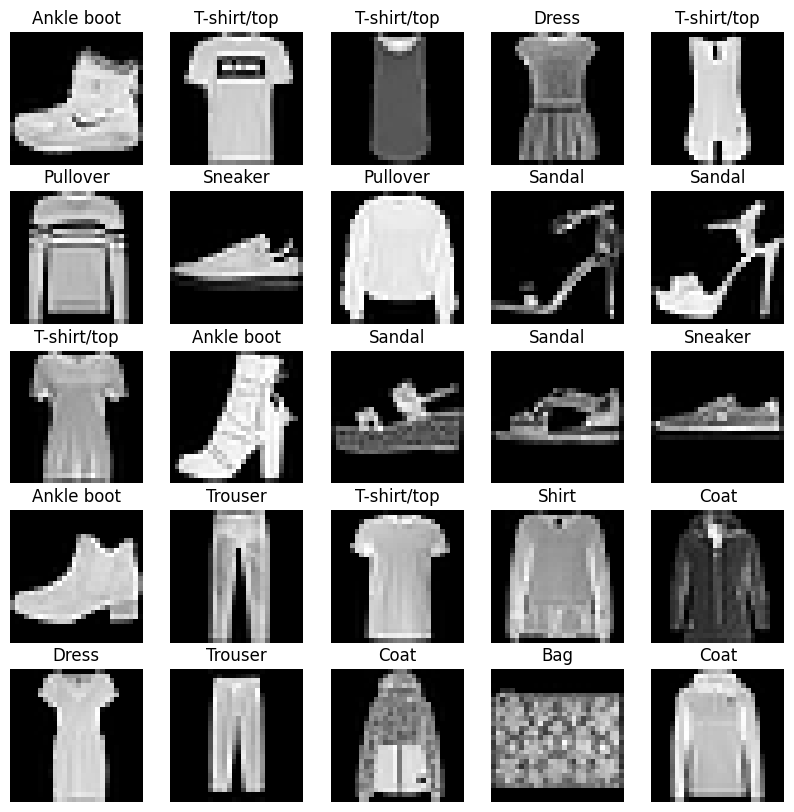

In [25]:
# Plot sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[i]])
    plt.axis('off')
plt.show()

In [25]:
def recommend_outfit(fashion_category):
    outfit_mapping = {
        'Young Male Casual': ['Pullover', 'Trouser', 'Sneaker'],
        'Old Male Casual': ['T-shirt/top', 'Trouser', 'Sneaker'],
        'Young Female Casual': ['T-shirt/top', 'Trouser', 'Sneaker'],
        'Old Female Casual': ['Dress', 'Sandal'],
        'Young Male Formal': ['Shirt', 'Trouser', 'Ankle boot'],
        'Old Male Formal': ['Shirt', 'Trouser', 'Ankle boot'],
        'Young Female Formal': ['Dress', 'Sandal', 'bag'],
        'Old Female Formal': ['Dress', 'Sandal', 'bag'],
        'Unknown': ['Shirt','Trouser']
    }
    return outfit_mapping.get(fashion_category, [])  # Return corresponding outfit

# Apply the recommend_outfit function to the 'Fashion_MNIST_Label' column
sample_celebA['Recommended_Outfit'] = sample_celebA['Fashion_MNIST_Label'].apply(recommend_outfit)
sample_celebA.to_csv('sample_celebA.csv', index=False) # saving this file as sample_celebA.csv

In [26]:
sample_celebA.head(10)

,image_id,Bangs,Black_Hair,Blond_Hair,Brown_Hair,Eyeglasses,Goatee,Gray_Hair,Heavy_Makeup,High_Cheekbones,...,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young,Attractive,No_Beard,Fashion_MNIST_Label,Recommended_Outfit
0,168561.jpg,-1,1,-1,-1,1,1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,1,-1,Young Male Casual,"[Pullover, Trouser, Sneaker]"
1,052712.jpg,-1,-1,-1,-1,-1,1,-1,-1,-1,...,-1,-1,-1,-1,1,-1,-1,-1,Old Male Casual,"[T-shirt/top, Trouser, Sneaker]"
2,067533.jpg,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,1,-1,1,Young Male Casual,"[Pullover, Trouser, Sneaker]"
3,164396.jpg,1,-1,1,-1,-1,-1,-1,1,1,...,-1,-1,1,-1,-1,1,1,1,Young Female Formal,"[Dress, Sandal, bag]"
4,132975.jpg,-1,-1,-1,1,-1,-1,-1,-1,1,...,-1,-1,-1,-1,1,1,1,1,Young Male Casual,"[Pullover, Trouser, Sneaker]"
5,008496.jpg,-1,1,-1,-1,-1,-1,-1,1,1,...,-1,-1,1,-1,-1,1,-1,1,Young Female Formal,"[Dress, Sandal, bag]"
6,096087.jpg,-1,1,-1,-1,-1,-1,-1,1,-1,...,-1,-1,1,-1,-1,1,1,1,Young Female Formal,"[Dress, Sandal, bag]"
7,031386.jpg,-1,-1,-1,-1,-1,-1,-1,1,1,...,-1,1,1,-1,-1,1,1,1,Young Female Formal,"[Dress, Sandal, bag]"
8,005279.jpg,-1,-1,-1,1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,-1,1,1,1,Young Female Casual,"[T-shirt/top, Trouser, Sneaker]"
9,181767.jpg,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,1,Young Male Casual,"[Pullover, Trouser, Sneaker]"


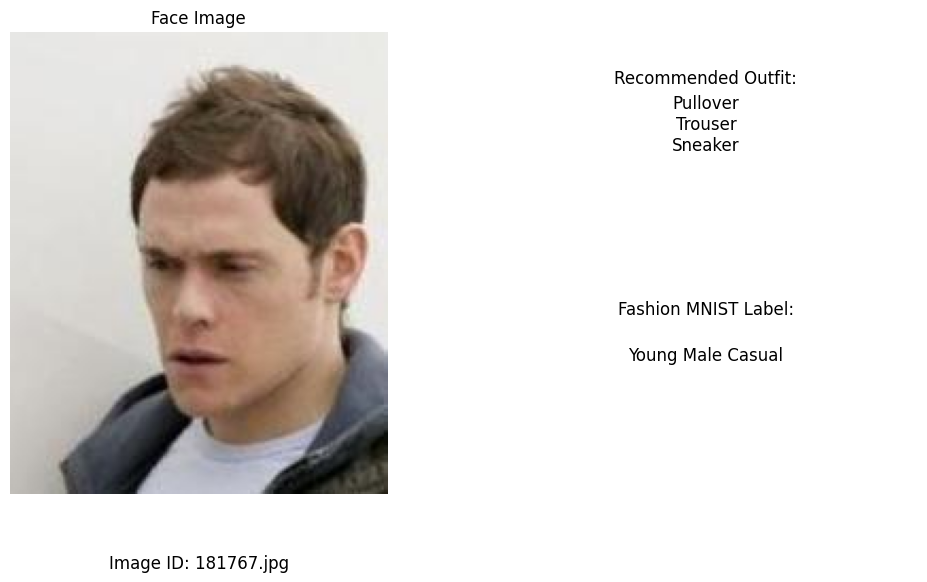

In [29]:
def display_outfit(image_id, df):
    # Construct the image path
    image_path = os.path.join('/content/celeba-dataset/img_align_celeba/img_align_celeba/', image_id)

    # Load and display the image of the face
    face_image = plt.imread(image_path)
    plt.figure(figsize=(12, 6))

    # Plot the face image
    plt.subplot(1, 2, 1)
    plt.imshow(face_image)
    plt.title('Face Image')
    plt.axis('off')

    # Print the image ID below the image
    plt.text(0.5, -0.15, f'Image ID: {image_id}', ha='center', va='center', fontsize=12, transform=plt.gca().transAxes)

    # Get the row corresponding to the image ID
    row = df[df['image_id'] == image_id]

    # Get the recommended outfit and fashion label from the dataframe
    recommended_outfit = row['Recommended_Outfit'].values[0]
    fashion_label = row['Fashion_MNIST_Label'].values[0]

    # Plot the recommended outfit and fashion label
    plt.subplot(1, 2, 2)
    plt.text(0.5, 0.9, 'Recommended Outfit:', ha='center', va='center', fontsize=12)
    plt.text(0.5, 0.8, '\n'.join(recommended_outfit), ha='center', va='center', fontsize=12)
    plt.text(0.5, 0.4, 'Fashion MNIST Label:', ha='center', va='center', fontsize=12)
    plt.text(0.5, 0.3, fashion_label, ha='center', va='center', fontsize=12)
    plt.axis('off')

    plt.show()

image_id = '181767.jpg'  # image ID

# Display the image of the face along with the recommended outfit
display_outfit(image_id, sample_celebA)

In [30]:
# Open a text file for writing
with open('outfit_recommendations.txt', 'w') as f:
    # Loop through each image and write the results to the file
    for index, row in sample_celebA.iterrows():
        image_id = row['image_id']
        fashion_label = row['Fashion_MNIST_Label']
        recommended_outfit = ', '.join(row['Recommended_Outfit'])
        f.write(f"Image ID: {image_id}, Category: {fashion_label}, Outfit: {recommended_outfit}\n") # writing the output

# CNN Model

In [13]:
# importing libries that needed
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [14]:
# Loading the data
data = sample_celebA[['image_id', 'Fashion_MNIST_Label']]

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96639 entries, 0 to 96638
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   image_id             96639 non-null  object
 1   Fashion_MNIST_Label  96639 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


In [15]:
# Convert Fashion_MNIST_Label to numerical labels
label_encoder = LabelEncoder()
data['Fashion_MNIST_Label'] = label_encoder.fit_transform(data['Fashion_MNIST_Label'])

<ipython-input-15-77848bb95326>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Fashion_MNIST_Label'] = label_encoder.fit_transform(data['Fashion_MNIST_Label'])


In [16]:
# data after encoding
data.head()

,image_id,Fashion_MNIST_Label
0,162909.jpg,0
1,062450.jpg,1
2,081771.jpg,3
3,197205.jpg,2
4,154164.jpg,2


In [ ]:
# function to load image
def load_image(image_id):
    image_path = os.path.join('/content/celeba-dataset/img_align_celeba/img_align_celeba/', image_id)
    image = load_img(image_path, target_size=(224, 224)) # adjusting size of image
    image_array = img_to_array(image)
    return image_array

# Load images and preprocess them
X_images = np.array([load_image(image_id) for image_id in data['image_id']])
y_labels = data['Fashion_MNIST_Label'].values

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_images, y_labels, test_size=0.2, random_state=42)

# Define the CNN architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

# Make predictions on the test set
predictions = model.predict(X_test)

# Convert the predicted numerical labels back into their original format
predicted_labels = label_encoder.inverse_transform(predictions)

# Print the predicted labels
print('Predicted labels:', predicted_labels)